In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df['Day'].dt.year
df['month'] = df['Day'].dt.month
df['day'] = df['Day'].dt.day
t_mean = df.groupby('year')['t'].mean()
print('Самый холодный год : ',t_mean.idxmin(),'  eго средняя температура: ',t_mean.min())
print('Самый теплый год: ',t_mean.idxmax(),'  его средняя температура: ',t_mean.max())

Самый холодный год :  2012   eго средняя температура:  6.980821917808219
Самый теплый год:  2015   его средняя температура:  9.07945205479452


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
df2 = df[(df['month'] == 1)&(df['t']>=0)]
t_pos = df2.groupby('year')['t'].count()
print('Год в котором количество дней с положительной температурой в январе максимальное: ',t_pos.idxmax(),'  количество дней',t_pos.max())

Год в котором количество дней с положительной температурой в январе максимальное:  2008   количество дней 19


**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
df3 = df[(df['month']>=6)&(df['month']<=8)]
t_smr = df3.groupby('year')['t'].mean() 
print('Самое холодное летобыло в ',t_smr.idxmin(),'  средняя температура: ',t_smr.min())

Самое холодное летобыло в  2008   средняя температура:  18.119565217391305


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
df['$\Delta$ t'] = abs(df['t'] - df['t'].shift(-1))
day = df.loc[df['$\Delta$ t'].idxmax()]
day_next = df.loc[df['$\Delta$ t'].idxmax() + 1]
print('День с наибольшим перепадом температуры:\n',day,'\n','следующий день:\n',day_next)

День с наибольшим перепадом температуры:
 Day           2014-05-26 00:00:00
t                              22
year                         2014
month                           5
day                            26
$\Delta$ t                     15
Name: 2334, dtype: object 
 следующий день:
 Day           2014-05-27 00:00:00
t                               7
year                         2014
month                           5
day                            27
$\Delta$ t                      2
Name: 2335, dtype: object


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

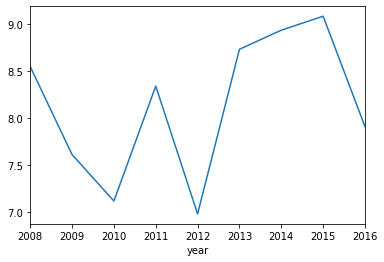

In [9]:
%matplotlib inline
t_mean.plot()